In [2]:
import math
import statistics as st
import numpy as np
import scipy.stats as ss
import pandas as pd

In [2]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan,4, 28.0]

In [3]:
print(x)

[8.0, 1, 2.5, 4, 28.0]


In [4]:
print(x_with_nan)

[8.0, 1, 2.5, nan, 4, 28.0]


In [5]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)

print(y)
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


# Measure of Central Tendency

Mean,
Weighted Mean,
Geometric Mean,
Harmonic Mean,
Median,
Mode,

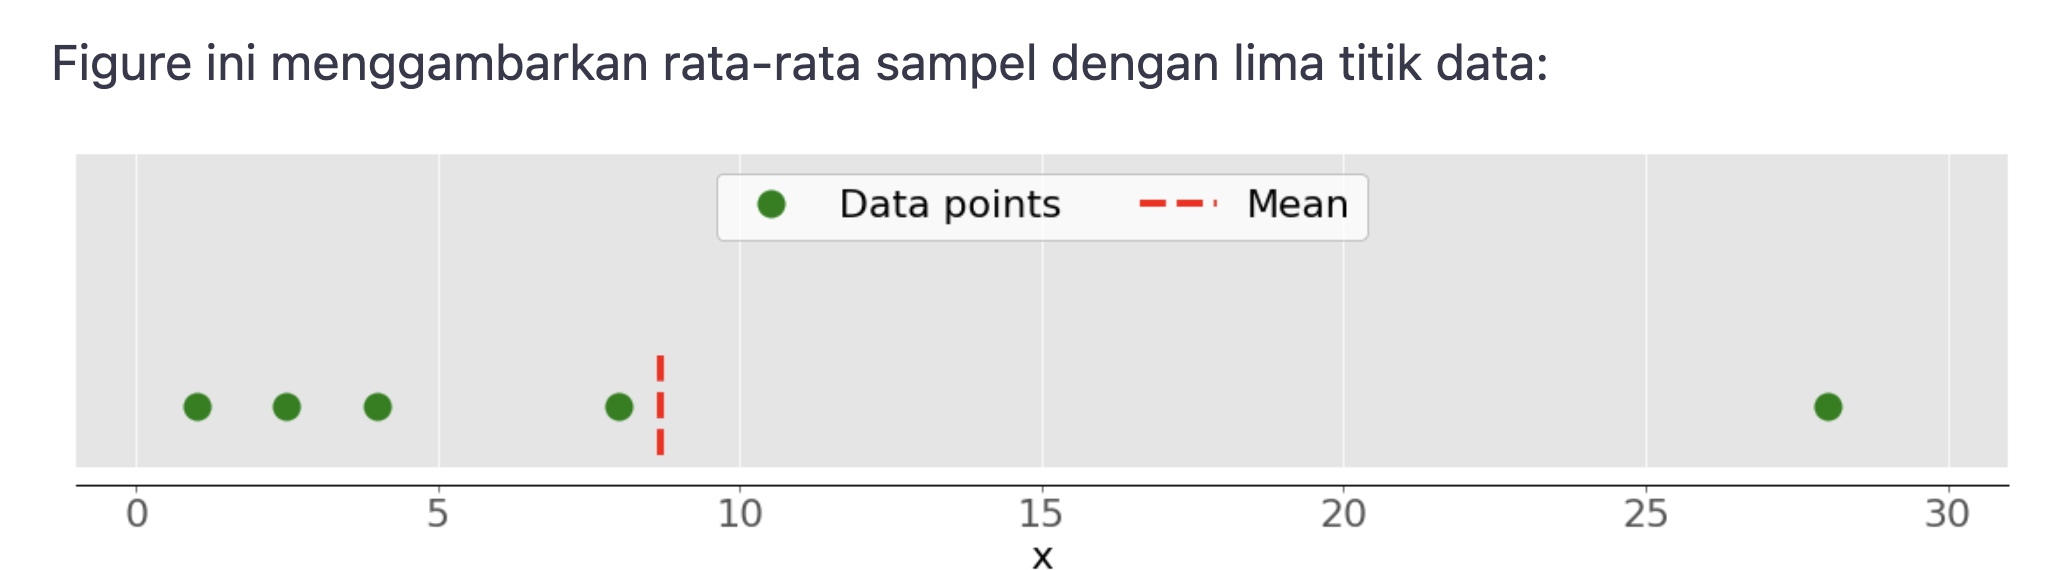

In [6]:
mean_ = sum(x) / len(x)
mean_

8.7

In [7]:
mean_ = st.mean(x)
mean_

8.7

In [8]:
mean_ = st.mean(x_with_nan)
mean_

nan

In [10]:
mean_ = np.mean(y)
mean_

8.7

In [11]:
type(y)

numpy.ndarray

In [12]:
mean_ = y.mean()
mean_

8.7

In [13]:
print(np.mean(y_with_nan))
print(y_with_nan.mean())

nan
nan


In [14]:
np.nanmean(y_with_nan)

8.7

In [16]:
z.mean()

8.7

In [21]:
z_with_nan.mean()

8.7

## Weighted Mean

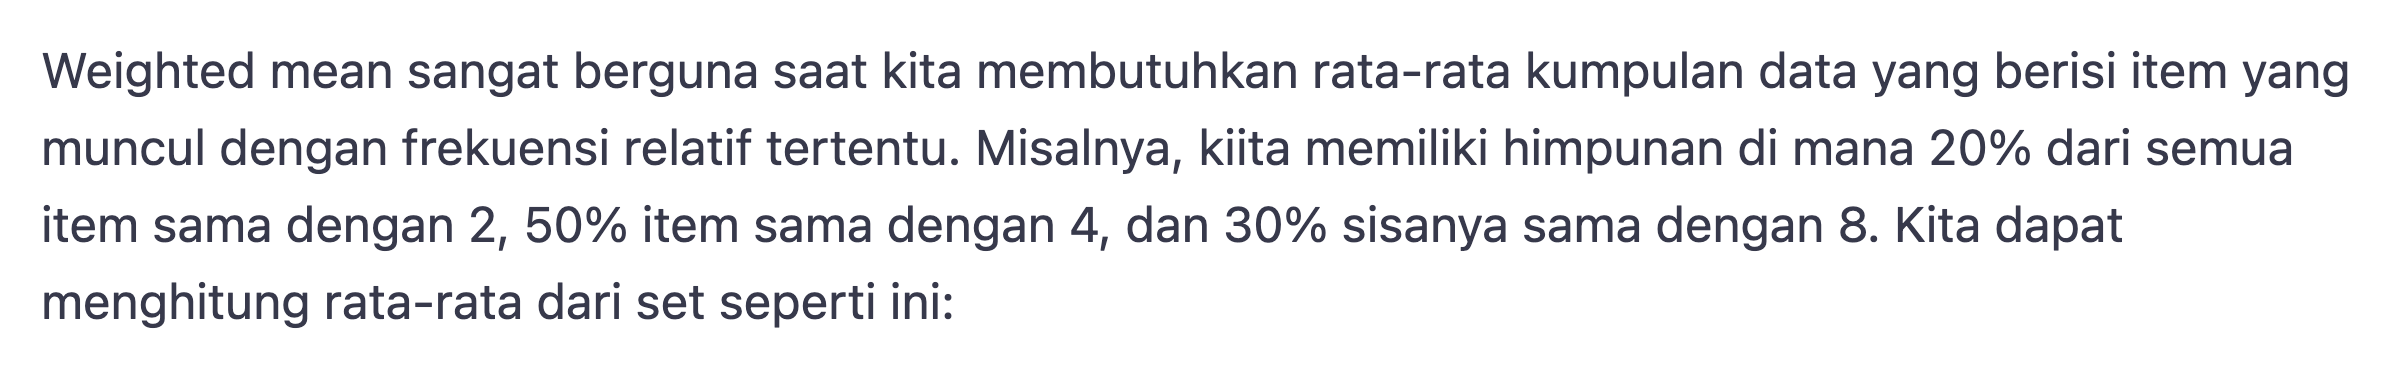

In [22]:
.2 * 2 + .5 * 4 + .3 * 8

4.8

In [23]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [.1, .2, .3, .25, .15]

In [24]:
wmean1 = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
wmean1

6.95

In [25]:
wmean2 = sum(w_ * x_ for w_, x_ in zip(w, x)) / sum(w)
wmean2

6.95

In [26]:
y, z, w = np.array(x), pd.Series(x), np.array(w)

In [27]:
wmean_arr = np.average(y, weights=w)
wmean_arr

6.95

In [28]:
wmean_ser = np.average(z, weights=w)
wmean_ser

6.95

## Harmonic Mean

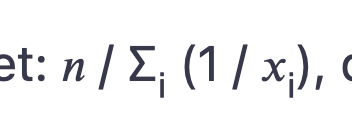
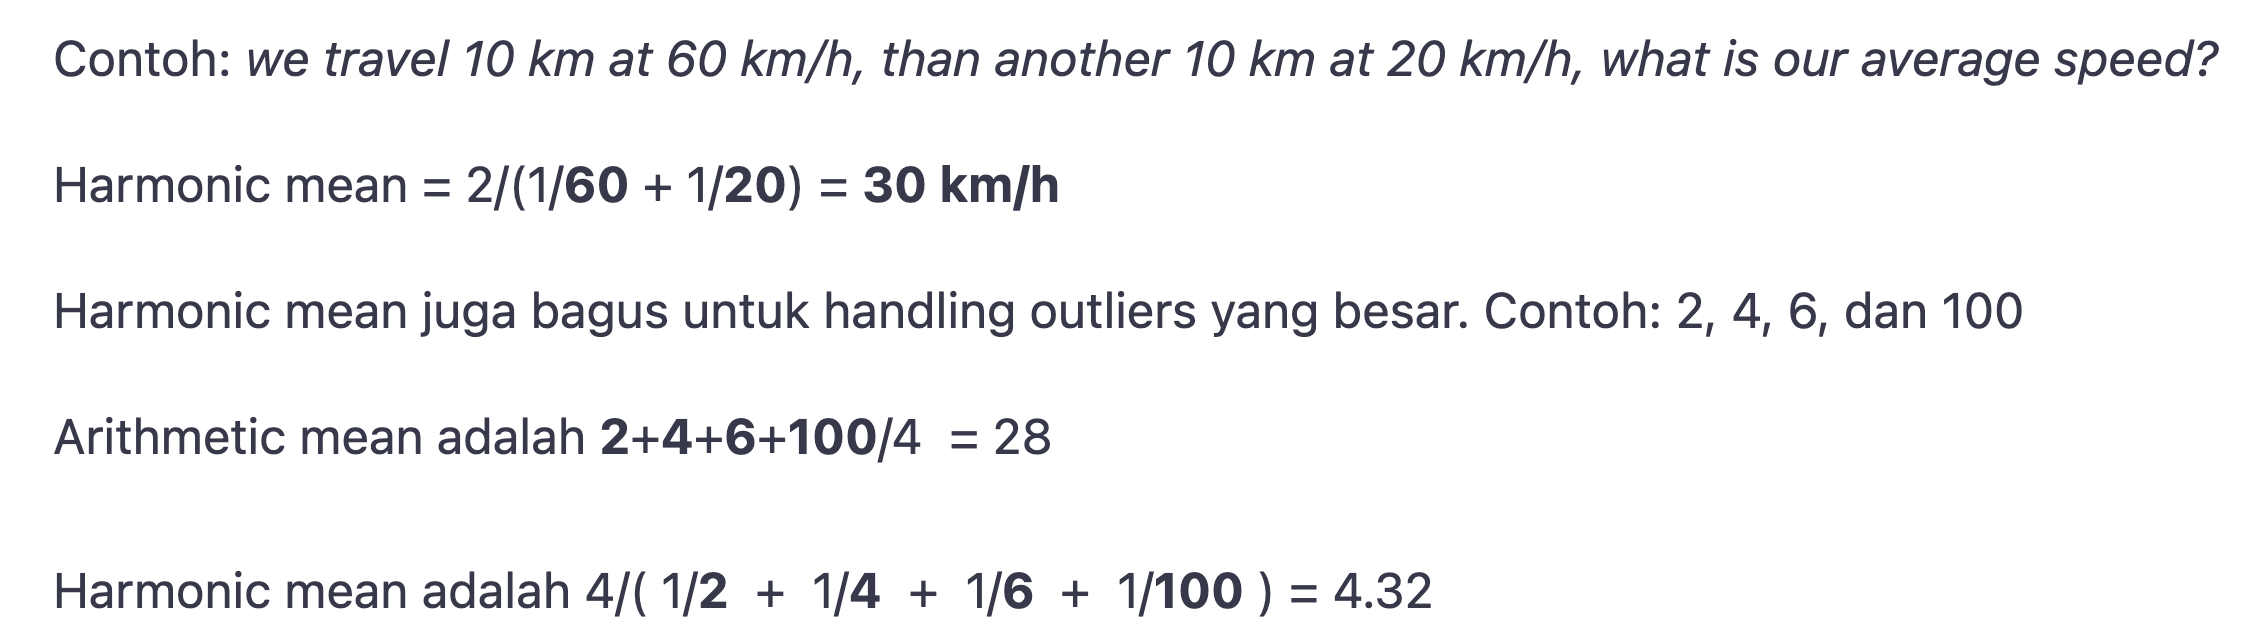

In [29]:
x

[8.0, 1, 2.5, 4, 28.0]

In [30]:
hmean_ = len(x) / sum(1/value for value in x)
hmean_

2.7613412228796843

In [31]:
mean_

8.7

In [32]:
hmean = st.harmonic_mean(x)
hmean

2.7613412228796843

In [33]:
ss.hmean(y)

2.7613412228796843

In [34]:
ss.hmean(z)

2.7613412228796843

## Geometric Mean

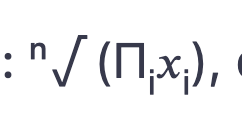
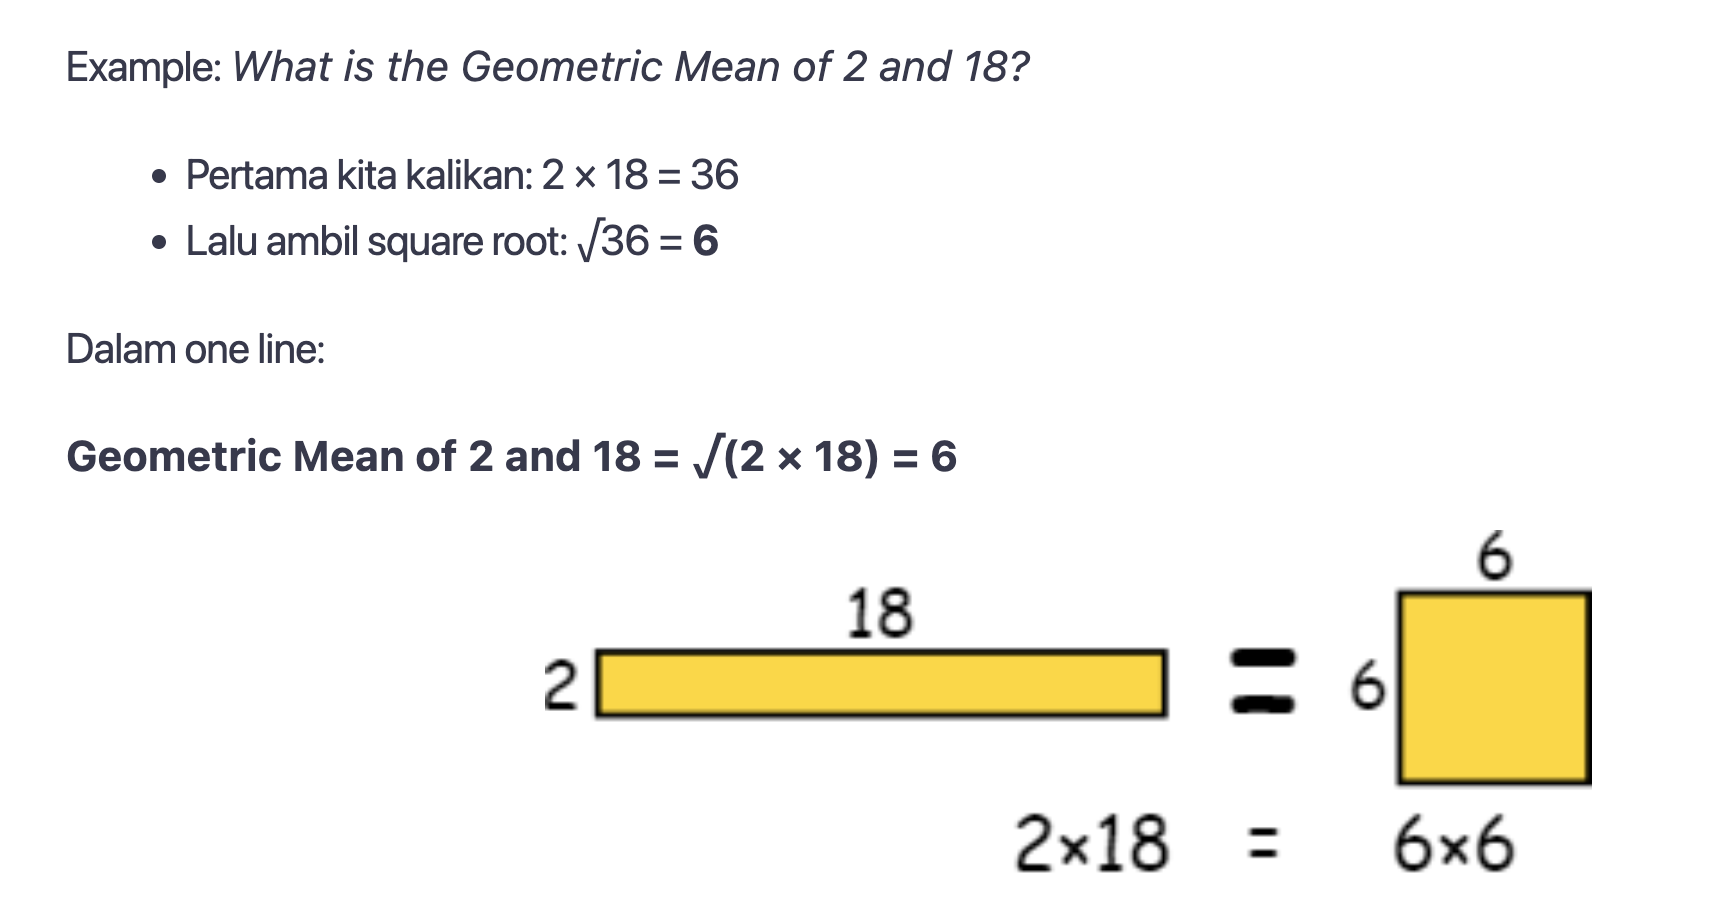
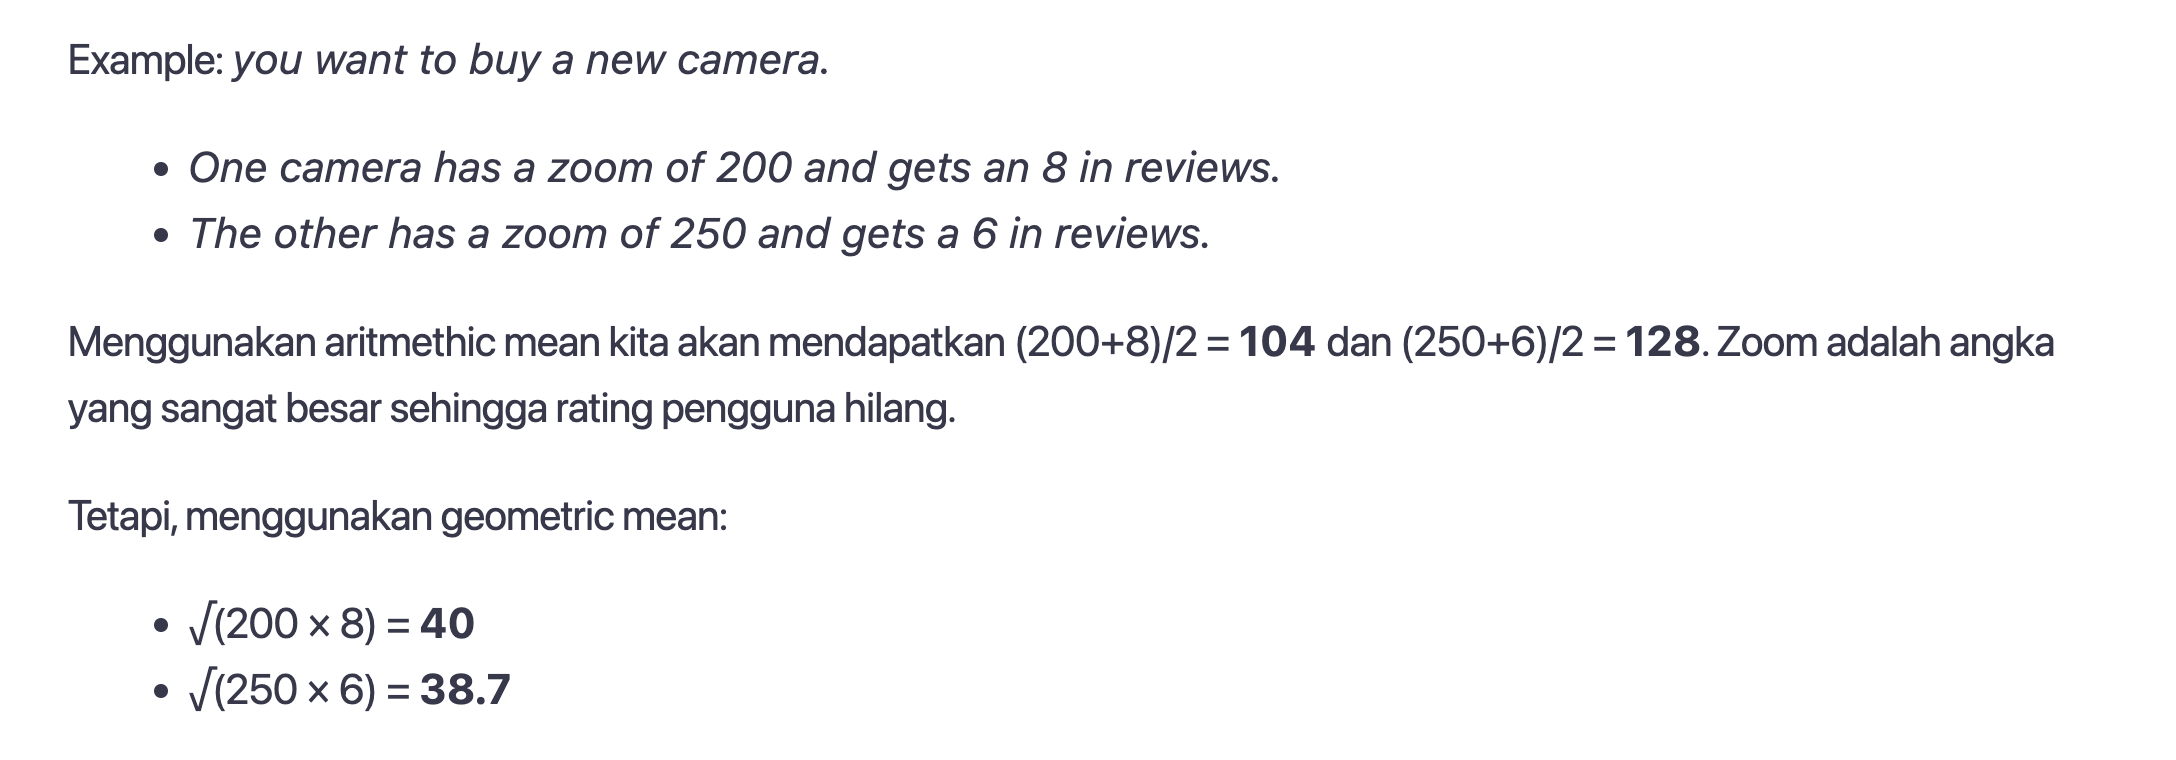
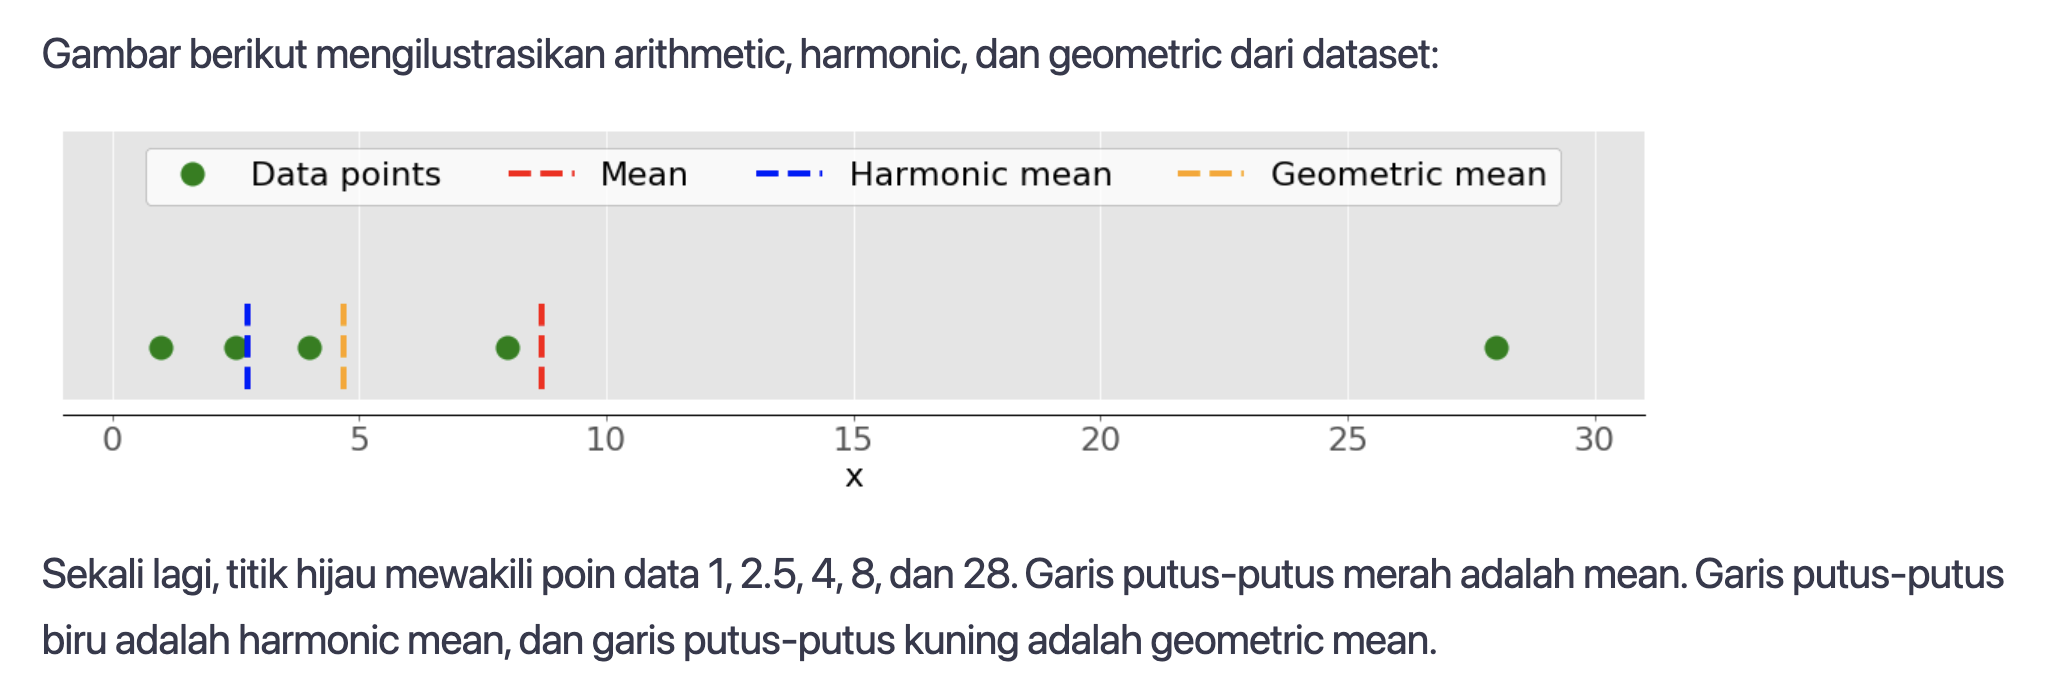

In [37]:
x

[8.0, 1, 2.5, 4, 28.0]

In [36]:
gmean = 1

for item in x:
    gmean *= item

gmean **= 1/len(x)
gmean

4.677885674856041

In [38]:
ss.gmean(y)

4.67788567485604

In [39]:
ss.gmean(z)

4.67788567485604

## Median

In [40]:
n = len(x)

if n%2 :
    median_ = sorted(x)[round(0.5*(n-1))]
else :
    x_ord, index = sorted(x), round(0.5*n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])
    
median_

4

In [41]:
x

[8.0, 1, 2.5, 4, 28.0]

In [42]:
sorted(x)

[1, 2.5, 4, 8.0, 28.0]

In [43]:
sorted(x[:-1])

[1, 2.5, 4, 8.0]

In [44]:
st.median_low(x[:-1])

2.5

In [45]:
st.median_high(x[:-1])

4

In [46]:
median_ = np.median(y)
median_

4.0

In [48]:
y

array([ 8. ,  1. ,  2.5,  4. , 28. ])

In [47]:
median_ = np.median(y[:-1])
median_

3.25

## Mode / Modus

In [49]:
u = [2, 3, 2, 8, 12]
v = [12, 15, 12, 15, 21, 15, 12]

In [50]:
mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [54]:
mode_ = st.mode(u)
mode_

2

In [55]:
u_arr, v_arr = np.array(u), np.array(v)

In [56]:
mode_ = ss.mode(u)
mode_

/var/folders/pw/z_nfq_0j4g3ckjz532ktnkjm0000gn/T/ipykernel_2066/944708631.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_ = ss.mode(u)


ModeResult(mode=array([2]), count=array([2]))

In [57]:
mode_ = ss.mode(v)
mode_

/var/folders/pw/z_nfq_0j4g3ckjz532ktnkjm0000gn/T/ipykernel_2066/823396222.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_ = ss.mode(v)


ModeResult(mode=array([12]), count=array([3]))

In [58]:
mode_.mode

array([12])

In [59]:
mode_.count

array([3])

In [60]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])

In [61]:
print(u.mode())
print(v.mode())
print(w.mode())

0    2
dtype: int64
0    12
1    15
dtype: int64
0    2.0
dtype: float64


# Measure of Variabilty

<ul>
    <li> Variance </li>
    <li> Standard deviation </li>
    <li> Skewness </li>
    <li> Percentile </li>
    <li> Range </li>
    <li> Covariance </li>
    <li> Correlation </li>
</ul>

## Variance

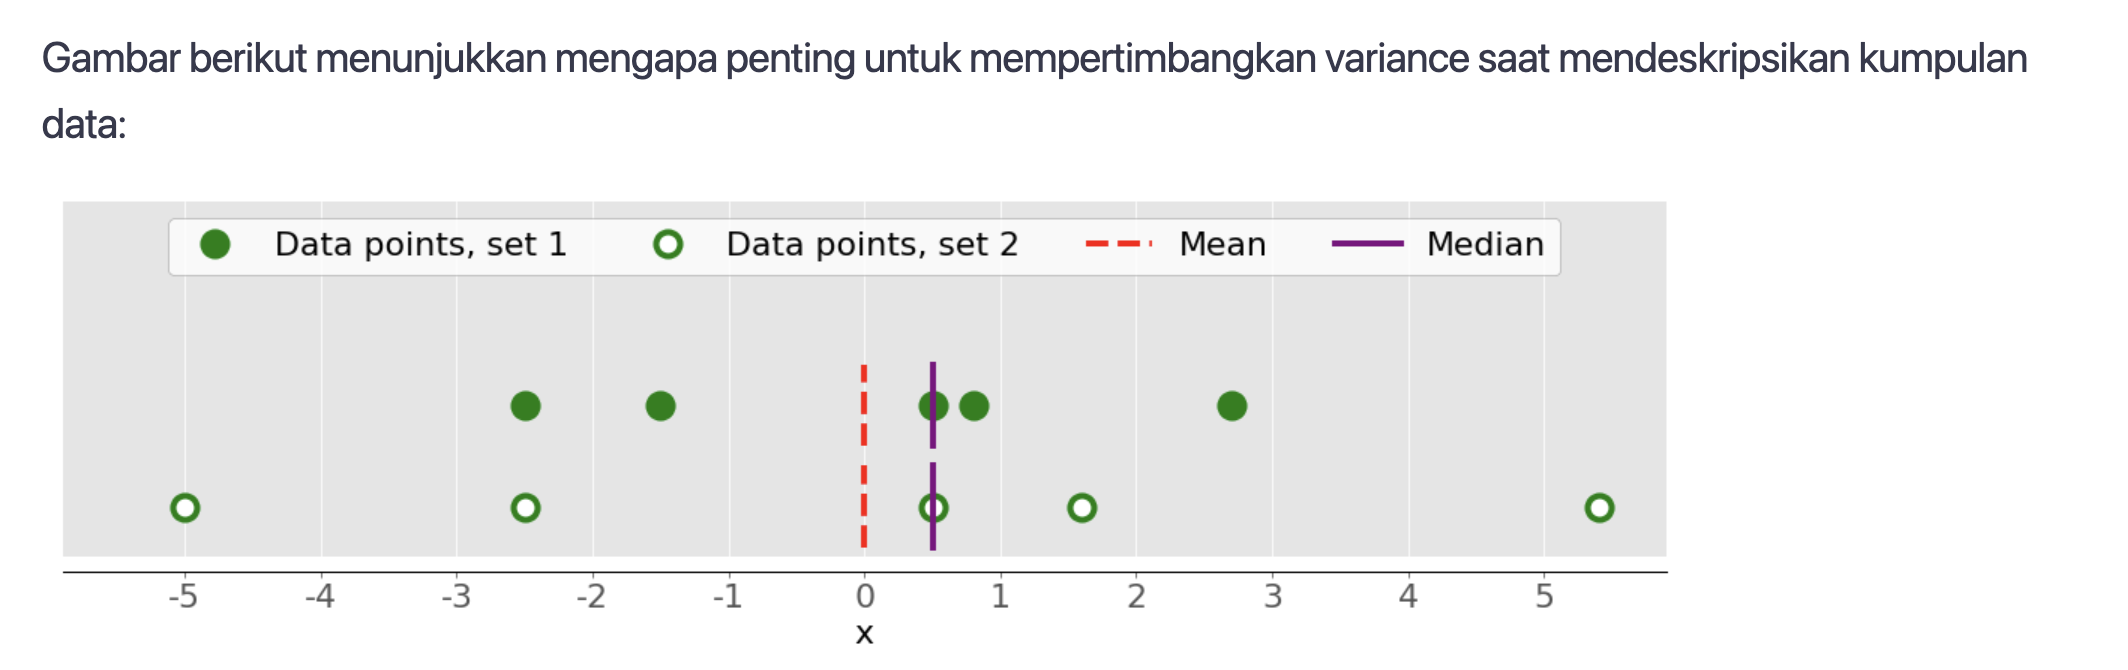
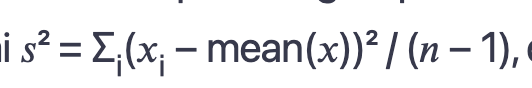

In [62]:
n = len(x)

mean_ = sum(x) / n

var_ = sum((item - mean_)**2 for item in x) / (n - 1)
var_

123.19999999999999

In [63]:
var_ = st.variance(x)
var_

123.2

In [64]:
var_ = np.var(y, ddof=1)
var_

123.19999999999999

In [70]:
y.var(ddof=1)

123.19999999999999

In [71]:
z.var()

123.19999999999999

In [ ]:
n = len(x)

mean_ = sum(x) / n

var_ = sum((item - mean_)**2 for item in x) / n
var_

In [ ]:
st.pvariance(x)

In [ ]:
y.var()
np.var(y)

## Standard Deviation

In [72]:
std_ = var_ ** .5
std_

11.099549540409285

In [73]:
st.stdev(x)

11.099549540409287

In [74]:
np.std(y, ddof=1)

11.099549540409285

In [75]:
y.std(ddof=1)

11.099549540409285

In [79]:
np.nanstd(y_with_nan, ddof=1)

11.099549540409285

In [81]:
z.std()

11.099549540409285

In [82]:
st.pstdev(x)

9.927738916792686

In [83]:
print(np.std(y, ddof=0))
print(y.std(ddof=0))

9.927738916792684
9.927738916792684


In [84]:
z.std(ddof=0)

9.927738916792684

## Skewness

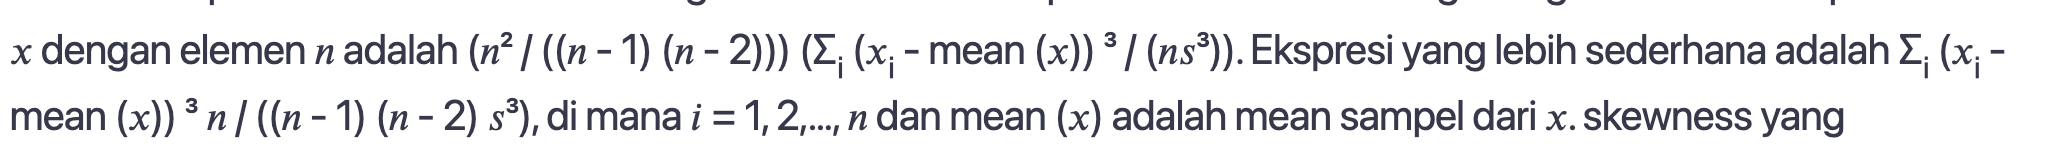
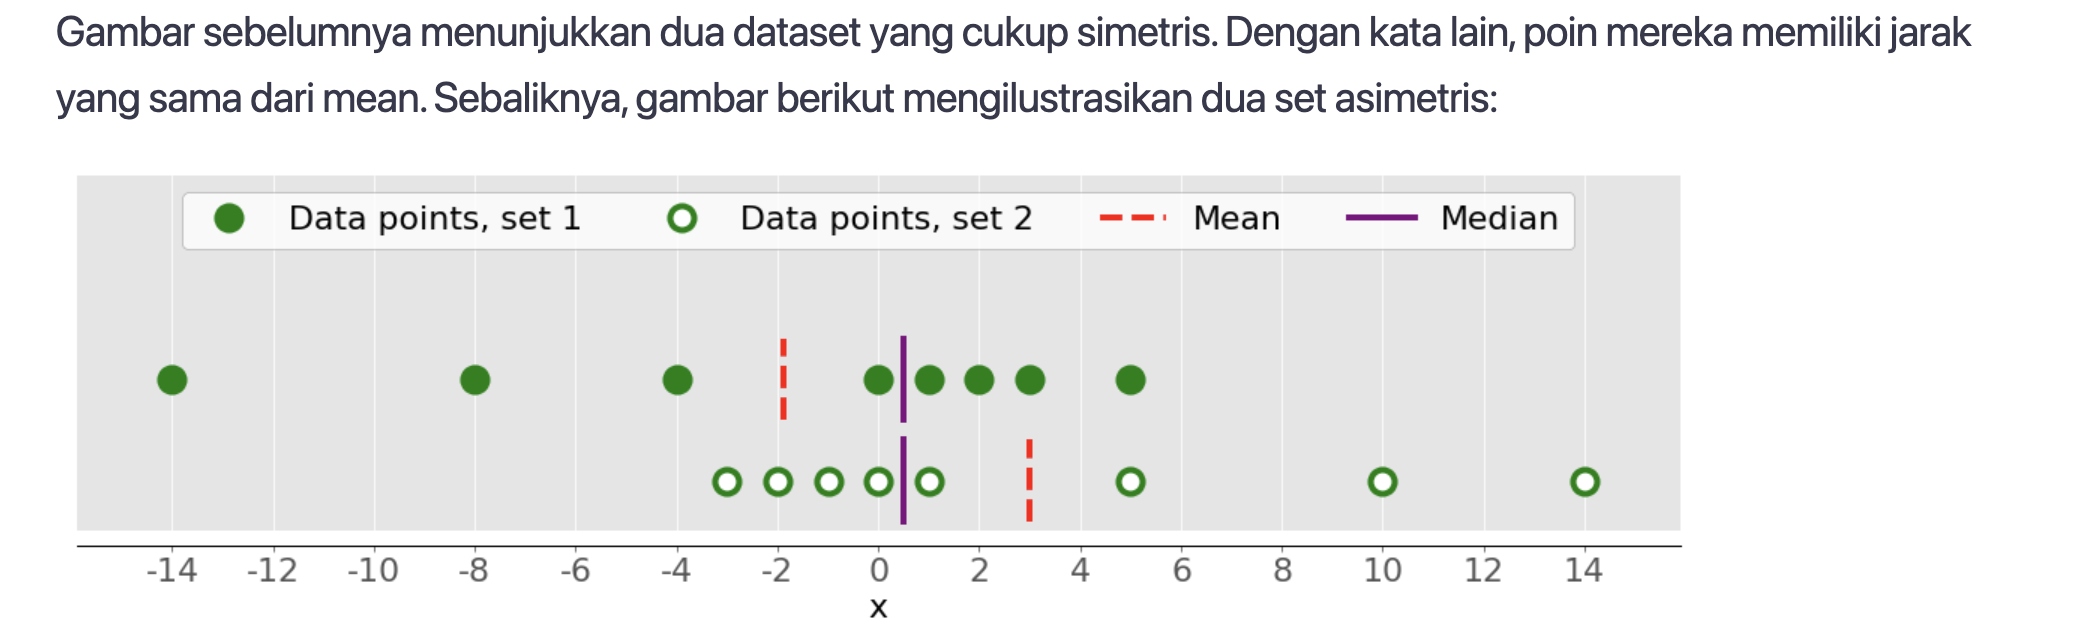

In [85]:
x

[8.0, 1, 2.5, 4, 28.0]

In [86]:
n = len(x)

mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n-1)
std_ = var_ ** 0.5

skew_ = sum((item - mean_)**3 for item in x) * n / ((n-1) * (n-2) * (std_**3))
skew_

1.9470432273905929

In [87]:
ss.skew(y, bias=False)

1.9470432273905927

In [91]:
ss.skew(y_with_nan, bias=False)

nan

In [90]:
print(ss.skew.__doc__)

    


Compute the sample skewness of a data set.

For normally distributed data, the skewness should be about zero. For
unimodal continuous distributions, a skewness value greater than zero means
that there is more weight in the right tail of the distribution. The
function `skewtest` can be used to determine if the skewness value
is close enough to zero, statistically speaking.

Parameters
----------
a : ndarray
    Input array.
axis : int or None, default: 0
    If an int, the axis of the input along which to compute the statistic.
    The statistic of each axis-slice (e.g. row) of the input will appear in a
    corresponding element of the output.
    If ``None``, the input will be raveled before computing the statistic.
bias : bool, optional
    If False, then the calculations are corrected for statistical bias.
nan_policy : {'propagate', 'omit', 'raise'}
    Defines how to handle input NaNs.
    
    - ``propagate``: if a NaN is present in the axis slice (e.g. row) along
      whi

In [93]:
z.skew()

1.9470432273905924

In [94]:
z_with_nan.skew()

1.9470432273905924

## Percentile

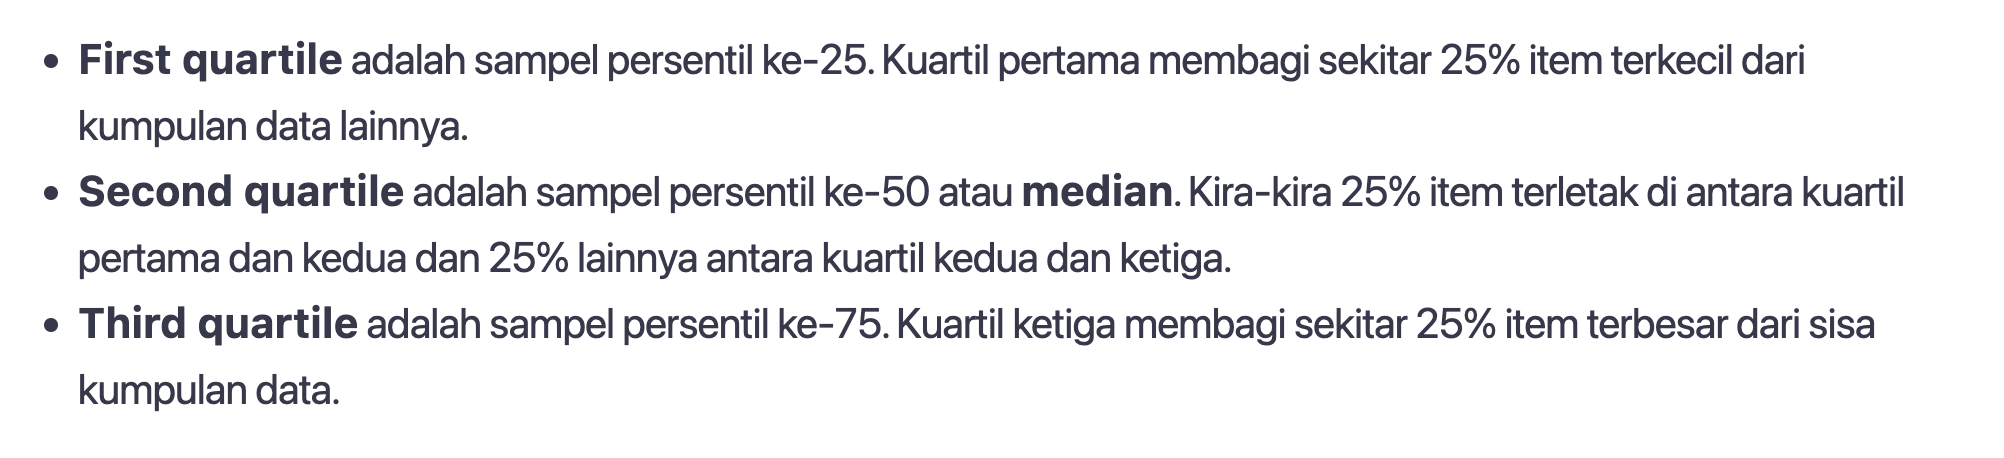

In [3]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]

In [96]:
st.quantiles(x, n=2)

[8.0]

In [97]:
st.quantiles(x, n=4, method='inclusive')

[0.1, 8.0, 21.0]

In [4]:
y = np.array(x)


In [99]:
np.percentile(y, 5)

-3.44

In [100]:
np.percentile(y, 95)

34.919999999999995

In [101]:
np.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [5]:
y_with_nan = np.insert(y, 2, np.nan)

In [103]:
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [105]:
np.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [106]:
np.quantile(y, 0.05)

-3.44

In [107]:
np.quantile(y, 0.95)

34.919999999999995

In [108]:
np.quantile(y, [.25, .50, .75])

array([ 0.1,  8. , 21. ])

In [6]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)

In [110]:
z.quantile(0.05)

-3.44

In [111]:
z.quantile([.25, .50, .75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

In [112]:
z_with_nan.quantile([.25, .50, .75])

0.25     0.1
0.50     8.0
0.75    21.0
dtype: float64

## Range

In [7]:
y

array([-5. , -1.1,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [8]:
np.ptp(y)

46.0

In [10]:
np.ptp(z)

46.0

In [11]:
np.ptp(y_with_nan)

nan

In [14]:
z_with_nan

0    -5.0
1    -1.1
2     NaN
3     0.1
4     2.0
5     8.0
6    12.8
7    21.0
8    25.8
9    41.0
dtype: float64

In [15]:
np.amax(y) - np.amin(y)

46.0

In [16]:
np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

46.0

In [17]:
y.max() - y.min()

46.0

In [18]:
z.max() - z.min()

46.0

In [19]:
z_with_nan.max() - z_with_nan.min()

46.0

In [20]:
# Interquartile Range / IQR
# Q3 - Q1
quartile = np.quantile(y, [.25, .75])

In [22]:
quartile[1] - quartile[0]

20.9

In [23]:
quartile = z.quantile([.25, .75])

In [25]:
quartile[0.75] - quartile[0.25]

20.9

## Summary of Descriptive Statistics

In [26]:
result = ss.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

In [27]:
result.minmax[1]

41.0

In [28]:
result.mean

11.622222222222222

In [33]:
result_ = z.describe()
result_

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

In [35]:
result_['mean']

11.622222222222222

In [36]:
result_['50%']

8.0

# Measure of Correlation Between pairs of Data

In [37]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]

In [40]:
x_arr, y_arr = np.array(x), np.array(y)
x_ser, y_ser = pd.Series(x), pd.Series(y)

## Covariance

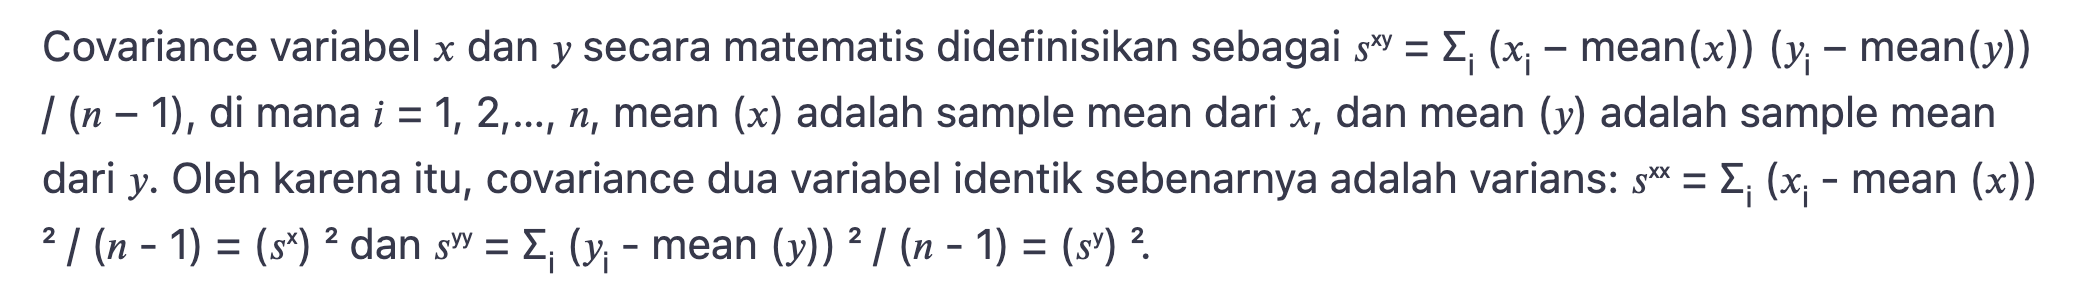

In [41]:
n = len(x)

mean_x, mean_y = sum(x)/n , sum(y)/n

cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n-1))

cov_xy

19.95

In [42]:
cov_matrix = np.cov(x_arr, y_arr)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [44]:
y_arr.var(ddof=1)

13.914285714285711

In [47]:
cov_xy = cov_matrix[1,0]
cov_xy

19.95

In [50]:
y_ser.cov(x_ser)

19.95

## Correlation Coefficient

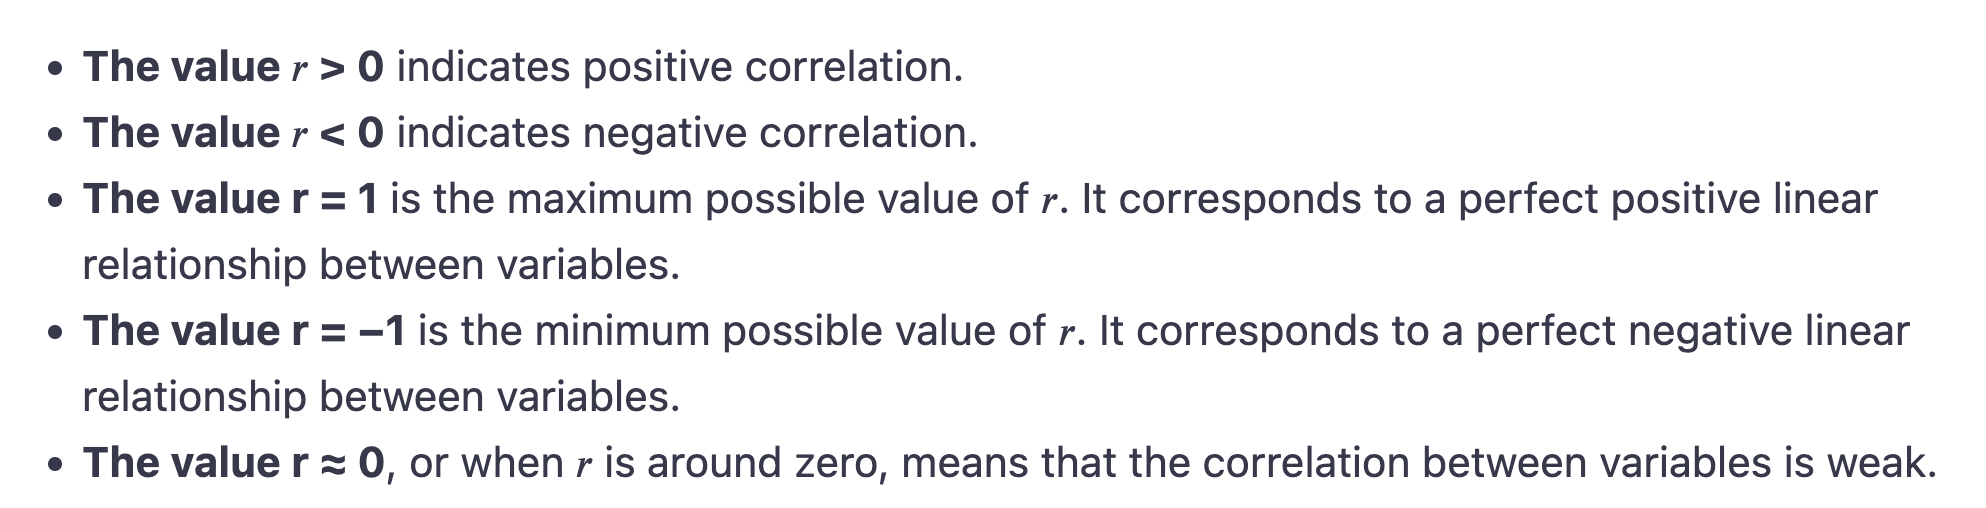
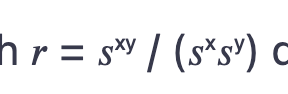

In [51]:
cov_xy

19.95

In [52]:
var_x = x_arr.var(ddof=1)
var_y = y_arr.var(ddof=1)

std_x = var_x ** 0.5
std_y = var_y ** 0.5

r = cov_xy / (std_x * std_y)
r

0.861950005631606

In [53]:
ss.pearsonr(x_arr, y_arr)

PearsonRResult(statistic=0.8619500056316061, pvalue=5.122760847201132e-07)

In [54]:
corr_matrix = np.corrcoef(x_arr, y_arr)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [55]:
r = corr_matrix[0, 1]
r

0.8619500056316061

In [57]:
result =ss.linregress(x_arr, y_arr)

In [58]:
result.rvalue

0.861950005631606

In [59]:
r = x_ser.corr(y_ser)
r

0.8619500056316061

## Working with 2D Data

### Axes

In [61]:
a = np.array([
    [1, 1, 1],
    [2, 3, 1],
    [4, 9, 2],
    [8,27, 4],
    [16,1, 1]
])

In [62]:
np.mean(a)

5.4

In [65]:
np.median(a, axis=1)

array([1., 2., 4., 8., 1.])

In [64]:
a.var(ddof=1)

53.40000000000001

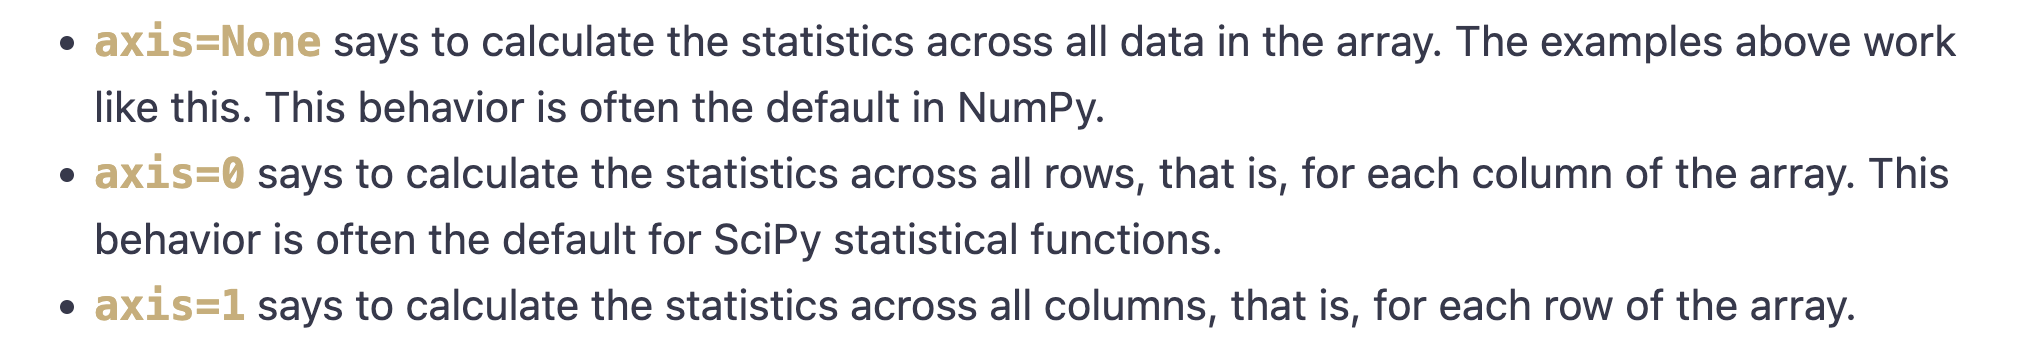

In [66]:
np.mean(a, axis=0)

array([6.2, 8.2, 1.8])

In [67]:
np.mean(a, axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [68]:
ss.gmean(a)

array([4.        , 3.73719282, 1.51571657])

In [69]:
ss.gmean(a, axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [70]:
ss.gmean(a, axis=None)

2.829705017016332

In [72]:
a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [75]:
ss.describe(a, axis=0).mean

array([6.2, 8.2, 1.8])

### DataFrame

In [77]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [81]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [79]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

In [82]:
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [84]:
df['A'].mean()

6.2

In [85]:
df['A'].var()

37.20000000000001

In [86]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [87]:
df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [88]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


In [89]:
df.describe().at['mean', 'A']

6.2

In [90]:
df.describe().at['50%', 'B']

3.0